# Lab2 2201184 ML


### create and read


File 'data.csv' created successfully
File 'data.csv' filled successfully with 30 records

First 6 rows of the data:
['x', 'y']
['2.3', '56']
['9.1', '81']
['5.9', '57']
['10.0', '57']
['3.8', '28']


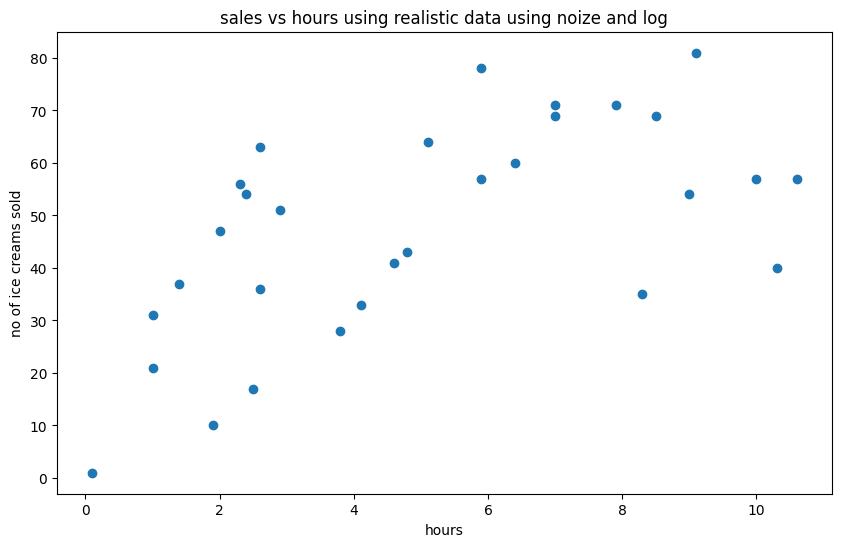

In [213]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt

def create_file(name):
    with open(name, 'w') as f:
        pass
    print(f"File '{name}' created successfully")

def generate_realistic_data(hours, base_sales, noise):
    return int(np.clip(base_sales * np.log(hours + 1) + noise, 1, 200))

def fill_file(name, count):
    with open(name, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['x', 'y'])
        
        for _ in range(count):
            hours = round(random.uniform(0, 12), 1)
            sales = generate_realistic_data(hours, 30, random.gauss(0, 15))
            writer.writerow([hours, sales])
    
    print(f"File '{name}' filled successfully with {count} records")

def read_file(name, num_rows=6):
    with open(name, 'r') as f:
        reader = csv.reader(f)
        for i, row in enumerate(reader):
            if i >= num_rows:
                break
            print(row)

def plot_data(name):
    hours, sales = [], []
    with open(name, 'r') as f:
        reader = csv.reader(f)
        next(reader)  # Skip header
        for row in reader:
            hours.append(float(row[0]))
            sales.append(int(row[1]))
    
    plt.figure(figsize=(10, 6))
    plt.scatter(hours, sales)
    plt.title("sales vs hours"+" using realistic data using noize and log")
    plt.xlabel("hours")
    plt.ylabel("no of ice creams sold")
    plt.savefig("icecream_sales_plot.png")
    plt.show()
    plt.clf()
    plt.close()

# Usage
filename = "data.csv"
create_file(filename)
fill_file(filename, 30)
print("\nFirst 6 rows of the data:")
read_file(filename)
plot_data(filename)

### Min and Max of each feature and range of each feature

In [214]:
def findmaxmin(name):
    f = open(name, 'r')
    reader = csv.reader(f)
    count = 0
    x = []
    y = []
    for row in reader:
        if count == 0:
            count += 1
            continue
        x.append(float(row[0]))
        y.append(int(row[1]))
    f.close()
    print("Max x:",max(x))
    print("Min x:",min(x))
    print("Max y:",max(y))
    print("Min y:",min(y))
    print("Range x:",max(x)-min(x))
    print("Range y:",max(y)-min(y))
    return

findmaxmin("data.csv")


Max x: 10.6
Min x: 0.1
Max y: 81
Min y: 1
Range x: 10.5
Range y: 80


### splitting the data into training and testing

In [215]:

def splitdata(name,ratio):
    f = open(name, 'r')
    reader = csv.reader(f)
    count = 0
    data = []
    for row in reader:
        if count == 0:
            count += 1
            continue
        data.append(row)
    f.close()
    random.shuffle(data)
    split = int(len(data)*ratio)
    training = data[:split]
    testing = data[split:]
    #save back to file with name split ratio
    f = open(f"training-ratio-{ratio}.csv", 'w')
    f.write('x' + "," + 'y' + "\n")
    for row in training:
        f.write(row[0] + "," + row[1] + "\n")
    f.close()
    ratio=(1-ratio)
    #round to 1 decimal place
    ratio=round(ratio,1)
    f = open(f"testing-ratio-{ratio}.csv", 'w')
    f.write('x' + "," + 'y' + "\n")
    for row in testing:
        f.write(row[0] + "," + row[1] + "\n")
    f.close()
    return training,testing

training1,testing1 = splitdata("data.csv",0.7)
training2,testing2 = splitdata("data.csv",0.8)
training3,testing3 = splitdata("data.csv",0.9)

print("Training 1 size:",len(training1))
print("Testing 1  size:",len(testing1))
print("Training 2 size:",len(training2))
print("Testing 2  size:",len(testing2))
print("Training 3 size:",len(training3))
print("Testing 3  size:",len(testing3))




Training 1 size: 21
Testing 1  size: 9
Training 2 size: 24
Testing 2  size: 6
Training 3 size: 27
Testing 3  size: 3


### APPLYING LINEAR REGRESSION

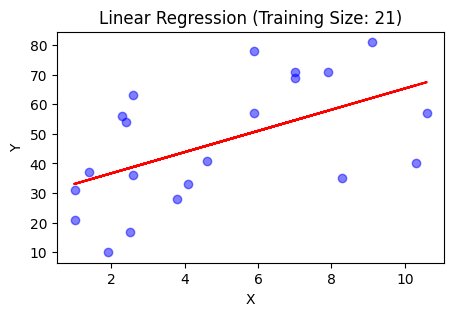

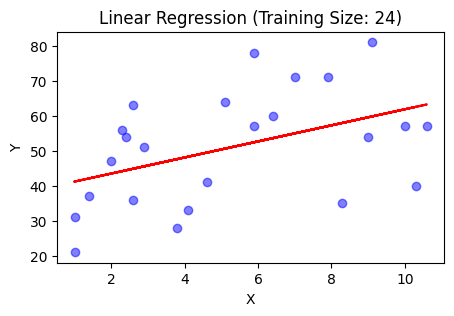

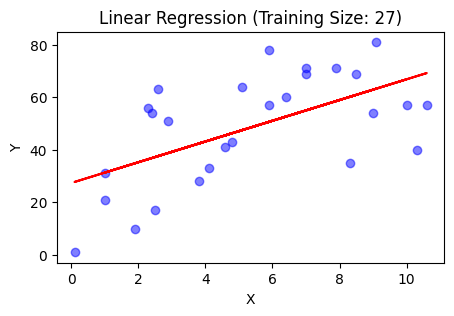

Training 1: Alpha = 29.5057, Beta = 3.5849
Training 2: Alpha = 38.8873, Beta = 2.2956
Training 3: Alpha = 27.3714, Beta = 3.9515


In [216]:
import numpy as np
import matplotlib.pyplot as plt

def linear_regression(training):
    x = np.array([float(row[0]) for row in training])
    y = np.array([int(row[1]) for row in training])
    
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean)**2)
    
    beta = numerator / denominator
    alpha = y_mean - beta * x_mean
    
    # Plot the line and scattered data
    plt.figure(figsize=(5, 3))
    plt.scatter(x, y, color='blue', alpha=0.5)
    plt.plot(x, alpha + beta * x, color='red')
    plt.title(f'Linear Regression (Training Size: {n})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    plt.clf()
    plt.close()
    
    return alpha, beta

# running on training data
alpha1, beta1 = linear_regression(training1)
alpha2, beta2 = linear_regression(training2)
alpha3, beta3 = linear_regression(training3)

print(f"Training 1: Alpha = {alpha1:.4f}, Beta = {beta1:.4f}")
print(f"Training 2: Alpha = {alpha2:.4f}, Beta = {beta2:.4f}")
print(f"Training 3: Alpha = {alpha3:.4f}, Beta = {beta3:.4f}")

### testing the model with test data

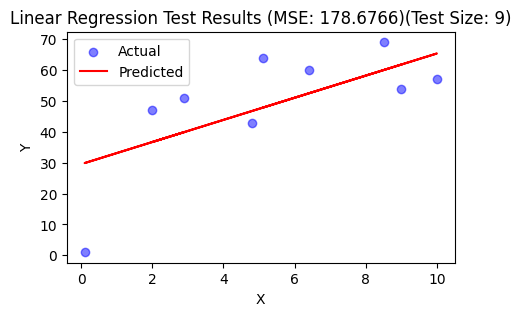

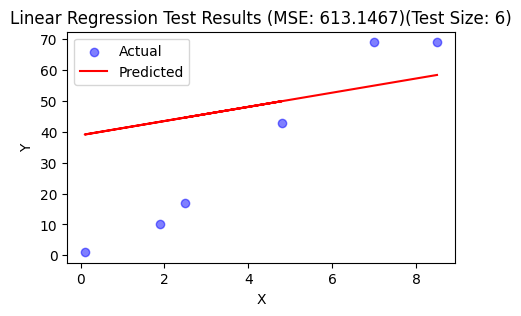

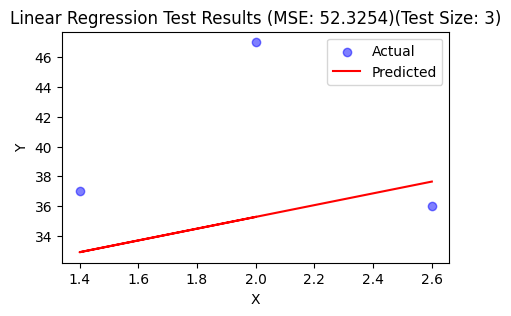

MSE for 70:30 split: 178.6766
MSE for 80:20 split: 613.1467
MSE for 90:10 split: 52.3254
Best split ratio: 90:10


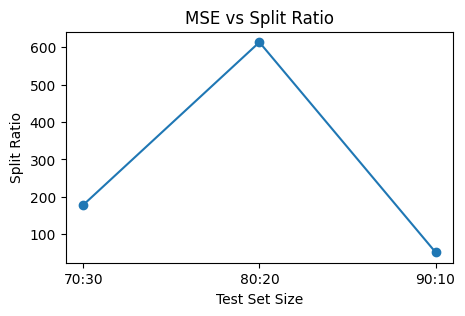

In [217]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_mse(alpha, beta, testing):
    x = np.array([float(row[0]) for row in testing])
    y = np.array([int(row[1]) for row in testing])
    
    y_pred = alpha + beta * x
    mse = np.mean((y - y_pred)**2)
    
    # Plotting
    plt.figure(figsize=(5, 3))
    plt.scatter(x, y, color='blue', alpha=0.5, label='Actual')
    plt.plot(x, y_pred, color='red', label='Predicted')
    plt.title(f'Linear Regression Test Results (MSE: {mse:.4f})(Test Size: {len(testing)})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()
    plt.close()
    
    return mse

# Assuming alpha1, beta1, testing1, etc. are already defined
mse1 = calculate_mse(alpha1, beta1, testing1)
mse2 = calculate_mse(alpha2, beta2, testing2)
mse3 = calculate_mse(alpha3, beta3, testing3)

print(f"MSE for 70:30 split: {mse1:.4f}")
print(f"MSE for 80:20 split: {mse2:.4f}")
print(f"MSE for 90:10 split: {mse3:.4f}")

ratios = [len(testing1)*10/3, len(testing2)*10/3, len(testing3)*10/3]
ratios = [(str(int(100-x))+":"+str(int(x))) for x in ratios]
mses = [mse1, mse2, mse3]
# best split
best_ratio = ratios[np.argmin(mses)]
print(f"Best split ratio: {best_ratio}")

plt.figure(figsize=(5,3))
plt.plot(ratios, mses, marker='o')
# annotate the best split ratio
best_ratio = ratios[np.argmin(mses)]
plt.title('MSE vs Split Ratio')
plt.xlabel('Test Set Size')
plt.ylabel('Split Ratio')
plt.show()
plt.close()